# **ReAct: Build Reasoning and Acting AI Agents with LangGraph**


Estimated time needed: **90** minutes


You're a software engineer on a mission: build an AI agent that doesn't just respond—it thinks. In this lab, you'll step into the role of an AI architect, designing a smart assistant that solves tough problems by reasoning through them and taking purposeful actions.

Using the ReAct (Reasoning + Acting) framework, you'll teach your agent to think step by step, consult tools like search engines or calculators, and adapt on the fly. It’s not just about answers—it’s about how the agent gets there.

By the end of the lab, your AI will face a mystery that can’t be solved with knowledge alone. It will need logic, resourcefulness, and the ability to act—just like you, the engineer who built it.

## What is ReAct?

**ReAct** stands for **Reasoning + Acting**. It's a framework that combines:

1. **Reasoning**: The agent thinks through problems step by step, maintaining an internal dialogue about what it needs to do.
2. **Acting**: The agent can use external tools (search engines, calculators, APIs) to gather information or perform actions.
3. **Observing**: The agent processes the results from its actions and incorporates them into its reasoning.

This creates a powerful loop: **Think → Act → Observe → Think → Act → ...**

### Why ReAct Matters

Traditional language models are limited by their training data cutoff and can't access real-time information. ReAct agents overcome this by:
- Accessing current information through web searches
- Performing calculations with specialized tools
- Breaking down complex problems into manageable steps
- Adapting their approach based on intermediate results


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup-&-Installation">Setup & Installation</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Understanding-Tools-in-ReAct">Understanding Tools in ReAct</a>
        <ol>
            <li><a href="#1.-Web-Search-Tool">1. Web Search Tool</a></li>
            <li><a href="#Theory-behind-Web-Search-Tools">Theory behind Web Search Tools</a></li>
            <li><a href="#Testing-the-Search-Tool">Testing the Search Tool</a></li>
            <li><a href="#2.-Clothing-Recommendation-Tool">2. Clothing Recommendation Tool</a></li>
            <li><a href="#Why-this-Tool-Matters">Why this Tool Matters</a></li>
            <li><a href="#Creating-the-tool-Registry">Creating the tool Registry</a></li>
        </ol>
    </li>
    <li>
        <a href="#Setting-up-the-Language-Model">Setting up the Language Model</a>
        <ol>
            <li><a href="#Initializing-the-AI-Model">Initializing the AI Model</a></li>
            <li><a href="#Creating-the-System-Prompt">Creating the System Prompt</a></li>
            <li><a href="#The-System-Prompt's-Role">The System Prompt's Role</a></li>
            <li><a href="#Binding-Tools-to-the-Model">Binding Tools to the Model</a></li>
            <li>
                <a href="#Understanding-Agent-State">Understanding Agent State</a>
                <ol>
                    <li><a href="#What-is-Agent-State?">What is Agent State?</a></li>
                    <li><a href="#Demonstrating-State-Management">Demonstrating State Management</a></li>
                </ol>
            </li>
            <li>
                <a href="#Manual-ReAct-Execution-(Understanding-the-Flow)">Manual ReAct Execution (Understanding the Flow)</a>
                <ol>
                    <li><a href="#Step-1:-Initial-Query-Processing">Step 1: Initial Query Processing</a></li>
                    <li><a href="#Step-2:-Tool-Execution">Step 2: Tool Execution</a></li>
                    <li><a href="#Step-3:-Processing-Results-and-Next-Action">Step 3: Processing Results and Next Action</a></li>
                    <li><a href="#Step-4:-Final-Response-Generation">Step 4: Final Response Generation</a></li>
                </ol>
            </li>
            <li>
                <a href="#Automating-ReAct-with-Graphs">Automating ReAct with Graphs</a>
                <ol>
                    <li><a href="#Why-Use-Graphs?">Why Use Graphs?</a></li>
                    <li><a href="#Building-the-Core-Functions">Building the Core Functions</a></li>
                    <li><a href="#Constructing-the-State-Graph">Constructing the State Graph</a></li>
                    <li><a href="#Visualizing-the-Graph">Visualizing the Graph</a></li>
                </ol>
            </li>
            <li>
                <a href="#Running-the-Complete-ReAct-Agent">Running the Complete ReAct Agent</a>
                <ol>
                    <li><a href="#Final-Execution">Final Execution</a></li>
                    <li><a href="#The-Complete-ReAct-Cycle">The Complete ReAct Cycle</a></li>
                </ol>
            </li>
        </ol>
    </li>
    <li>
        <a href="#Key-Takeaways">Key Takeaways</a>
        <ol>
            <li><a href="#What-Makes-ReAct-Powerful">What Makes ReAct Powerful</a></li>
            <li><a href="#Best-Practices">Best Practices</a></li>
        </ol>
    </li>
    <li>
        <a href="#Exercises">Exercises</a>
        <ol>
            <li><a href="#Exercise-1---Build-a-Calculator-Tool">Exercise 1 - Build a Calculator Tool</a></li>
            <li><a href="#Exercise-2---Create-a-News-Summary-Tool">Exercise 2 - Create a News Summary Tool</a></li>
        </ol>
    </li>
    <li><a href="#Testing-Your-Solutions">Testing Your Solutions</a></li>
    <li><a href="#Authors">Authors</a></li>
</ol>


## Objectives

After completing this lab you will be able to:

 - Use the ReAct framework to solve multi-step problems with external tools
 - Teach an AI agent to reason step by step, take actions, and adapt based on results
 - Build a smart assistant that can handle tasks requiring logic and tool use


----


## Setup & Installation


For this lab, we will be using the following libraries:


- [`LangGraph`](https://www.langchain.com/langgraph): A framework for building stateful, multi-step AI applications using graphs.
- [`LangChain`](https://www.langchain.com/): A toolkit that provides tools and abstractions for working with language models.
- [`LangChain-OpenAI`](https://python.langchain.com/docs/integrations/llms/openai/): OpenAI integration for LangChain.
- [`LangChain-Community`](https://python.langchain.com/api_reference/community/index.html): Community-contributed tools and integrations.


### Installing Required Libraries


In [14]:
!pip install -U langgraph langchain-openai

zsh:1: command not found: pip


In [15]:
%%capture
!pip install langgraph==0.3.34 langchain-openai==0.3.14 langchainhub==0.1.21 langchain==0.3.24 pygraphviz==1.14 langchain-community==0.3.23

### Understanding Tools in ReAct

Tools are the "acting" part of ReAct. They give the agent capabilities beyond just generating text. Let's build two essential tools:

#### 1. Web Search Tool
### Tavily Search API Key Setup

We'll use Tavily search as our external research tool. You can get an API key at https://app.tavily.com/sign-in   


**Disclaimer:** Signing up for Tavily provides you with free credits, more than enough for this project's needs. If you require additional credits for further use, please add them at your own discretion.

![image.png](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UjJx1-0vss4_3lwsUF8n0w/image.png)

You need to copy the key from Tavily's API website and paste the key on the line ```os.environ["TAVILY_API_KEY"] = "YOUR_KEY_HERE"```


In [1]:
import warnings 
warnings.filterwarnings('ignore')

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain.tools import tool
import os
import json
from dotenv import load_dotenv
load_dotenv()

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

# Initialize the Tavily search tool
search = TavilySearchResults()

@tool
def search_tool(query: str):
    """
    Search the web for information using Tavily API.

    :param query: The search query string
    :return: Search results related to the query
    """
    return search.invoke(query)

/var/folders/nm/srw3ygl55jbgpddqwgysqjpm0000gn/T/ipykernel_19161/900289169.py:14: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search = TavilySearchResults()


### Theory behind Web Search Tools:
- Enable real-time information retrieval
- Overcome the knowledge cutoff limitation of language models
- Return structured data that the agent can process and reason about

### Testing the Search Tool


In [2]:
search_tool.invoke("What's the weather like in Tokyo today?")

[{'title': 'Tokyo weather in October 2025 - Weather25.com',
  'url': 'https://www.weather25.com/asia/japan/tokyo?page=month&month=October',
  'content': 'You can expect about 3 to 8 days of rain in Tokyo during the month of October. It’s a good idea to bring along your umbrella so that you don’t get caught in poor weather.\n\nOur weather forecast can give you a great sense of what weather to expect in Tokyo in October 2025.\n\nIf you’re planning to visit Tokyo in the near future, we highly recommend that you review the 14 day weather forecast for Tokyo before you arrive.\n\nTemperatures\n\nTemperatures\n\n22° / 15°\n\nRainy Days\n\nRainy Days\n\nSnowy Days [...] | \nPatchy rain possible\n28° /23°\n | \nLight drizzle\n29° /21°\n | \nPatchy rain possible\n20° /20°\n | \nPatchy rain possible\n25° /19°\n | \nModerate rain\n22° /20°\n | \nLight drizzle\n20° /18°\n | \nPartly cloudy\n22° /17°\n |\n\n| \nPatchy rain possible\n17° /16°\n | \nLight drizzle\n18° /15°\n | \nLight drizzle\n22° /18

This test demonstrates how the agent can access current information that wasn't available during training.

#### 2. Clothing Recommendation Tool


In [3]:
@tool
def recommend_clothing(weather: str) -> str:
    """
    Returns a clothing recommendation based on the provided weather description.

    This function examines the input string for specific keywords or temperature indicators 
    (e.g., "snow", "freezing", "rain", "85°F") to suggest appropriate attire. It handles 
    common weather conditions like snow, rain, heat, and cold by providing simple and practical 
    clothing advice.

    :param weather: A brief description of the weather (e.g., "Overcast, 64.9°F")
    :return: A string with clothing recommendations suitable for the weather
    """
    weather = weather.lower()
    if "snow" in weather or "freezing" in weather:
        return "Wear a heavy coat, gloves, and boots."
    elif "rain" in weather or "wet" in weather:
        return "Bring a raincoat and waterproof shoes."
    elif "hot" in weather or "85" in weather:
        return "T-shirt, shorts, and sunscreen recommended."
    elif "cold" in weather or "50" in weather:
        return "Wear a warm jacket or sweater."
    else:
        return "A light jacket should be fine."

**Why this Tool Matters:**
- Demonstrates domain-specific reasoning
- Shows how tools can process and interpret data from other tools
- Illustrates the composability of ReAct systems

#### Creating the Tool Registry


In [4]:
tools=[search_tool,recommend_clothing]

tools_by_name={ tool.name:tool for tool in tools}

This registry allows the agent to dynamically select and invoke the appropriate tool based on the task at hand.

## Setting Up the Language Model

### Initializing the AI Model


In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool

model = ChatOpenAI(
    model="qwen/qwen3-32b",
    base_url="https://api.groq.com/openai/v1",
    api_key=os.getenv("GROQ_API_KEY")
)

We're using GPT-4o-mini as our reasoning engine. This model will:
- Analyze user queries
- Decide which tools to use
- Process tool results
- Generate final responses

### Creating the System Prompt


In [6]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, ToolMessage, SystemMessage

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", """
You are a helpful AI assistant that thinks step-by-step and uses tools when needed.

When responding to queries:
1. First, think about what information you need
2. Use available tools if you need current data or specific capabilities  
3. Provide clear, helpful responses based on your reasoning and any tool results

Always explain your thinking process to help users understand your approach.
"""),
    MessagesPlaceholder(variable_name="scratch_pad")
])

**The System Prompt's Role:**
- Defines the agent's behavior and personality
- Establishes the reasoning pattern (think → act → observe)
- Encourages transparency in the decision-making process

### Binding Tools to the Model


In [7]:
model_react = chat_prompt | model.bind_tools(tools)

This creates a model that can:
- Understand when to use tools
- Generate properly formatted tool calls
- Process tool results in context

## Understanding Agent State

### What is Agent State?

In ReAct, state management is crucial, as the agent must maintain context across multiple reasoning and acting steps.


In [8]:
from typing import (Annotated, Sequence, TypedDict)
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""

    # add_messages is a reducer
    # See https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers
    messages: Annotated[Sequence[BaseMessage], add_messages]

**Key Concepts:**
- **State**: Contains the conversation history and context.
- **Reducer**: `add_messages` automatically handles adding new messages to the conversation.
- **Type Safety**: TypedDict ensures our state structure is well-defined.

### Demonstrating State Management


In [9]:
# Example conversation flow:
state: AgentState = {"messages": []}

# append a message using the reducer properly
state["messages"] = add_messages(state["messages"], [HumanMessage(content="Hi")])
print("After greeting:", state["messages"])

# add another message (e.g. a question)
state["messages"] = add_messages(state["messages"], [HumanMessage(content="Weather in NYC?")])
print("After question:", state)

After greeting: [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='e713f564-6286-4db3-a2fb-17737c9b9dd6')]
After question: {'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='e713f564-6286-4db3-a2fb-17737c9b9dd6'), HumanMessage(content='Weather in NYC?', additional_kwargs={}, response_metadata={}, id='3335b15f-71d1-4ac1-b798-f1f59111366f')]}


This demonstrates how the state accumulates context over the conversation.


## Manual ReAct Execution (Understanding the Flow)

Before building the automated graph, let's manually step through a ReAct cycle to understand what happens:

### Step 1: Initial Query Processing


In [10]:
dummy_state: AgentState = {
    "messages": [HumanMessage( "What's the weather like in Zurich, and what should I wear based on the temperature?")]
}

response = model_react.invoke({"scratch_pad": dummy_state["messages"]})

dummy_state["messages"] = add_messages(dummy_state["messages"], [response])

**What Happens Here:**
1. The user asks a complex question requiring current data.
2. The model analyzes the query and realizes it needs to search for weather information.
3. The model generates a tool call for the search.


In [13]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h7dqy0ec6', 'function': {'arguments': '{"query":"current weather in Zurich temperature"}', 'name': 'search_tool'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 463, 'prompt_tokens': 430, 'total_tokens': 893, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.091319779, 'prompt_time': 0.020643655, 'completion_time': 1.03588475, 'total_time': 1.056528405}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'id': 'chatcmpl-f360e252-d741-41b5-806e-648afb50e7f2', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--399c3a46-0edf-47fb-84b0-4c5348afd86f-0', tool_calls=[{'name': 'search_tool', 'args': {'query': 'current weather in Zurich temperature'}, 'id': 'h7dqy0ec6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 430, 'output_tokens': 463, 'total_tokens': 893, 'input_token_details': {

### Step 2: Tool Execution


In [11]:
tool_call = response.tool_calls[-1]
print("Tool call:", tool_call)

tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
print("Tool result preview:", tool_result[0]['title'])

tool_message = ToolMessage(
    content=json.dumps(tool_result),
    name=tool_call["name"],
    tool_call_id=tool_call["id"]
)
dummy_state["messages"] = add_messages(dummy_state["messages"], [tool_message])

Tool call: {'name': 'search_tool', 'args': {'query': 'current weather in Zurich temperature'}, 'id': 'h7dqy0ec6', 'type': 'tool_call'}
Tool result preview: 2025 Weather History in Zürich Switzerland


**What Happens Here:**
1. Extract the tool call from the model's response.
2. Execute the tool using the specified arguments.
3. Create a ToolMessage containing the results.
4. Add the tool result to the conversation state.


### Step 3: Processing Results and Next Action


In [14]:
response = model_react.invoke({"scratch_pad": dummy_state["messages"]})
dummy_state['messages'] = add_messages(dummy_state['messages'], [response])

# check if the model wants to use another tool
if response.tool_calls:
    tool_call = response.tool_calls[0]
    tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
    tool_message = ToolMessage(
        content=json.dumps(tool_result),
        name=tool_call["name"],
        tool_call_id=tool_call["id"]
    )
    dummy_state['messages'] = add_messages(dummy_state['messages'], [tool_message])

**What Happens Here:**
1. The model processes the search results.
2. It realizes it needs to use the clothing recommendation tool.
3. It extracts weather information and calls the clothing tool.
4. It receives clothing recommendations based on the weather data.


### Step 4: Final Response Generation


In [15]:
response = model_react.invoke({"scratch_pad": dummy_state["messages"]})
print("Final response generated:", response.content is not None)
print("More tools needed:", bool(response.tool_calls))

Final response generated: True
More tools needed: False


In [22]:
from pprint import pprint

pprint(response.content)

('The current weather in Zurich is **50°F (10°C)** with mostly cloudy '
 'conditions, a gentle breeze of 11.5 mph, and 76% humidity. There’s no '
 'immediate precipitation reported. \n'
 '\n'
 '**Clothing recommendation**:  \n'
 'Wear a **warm jacket or sweater** to stay comfortable in the cooler '
 'temperature. If there’s wind, a windbreaker could add extra protection.  \n'
 '\n'
 'For more details, the weather outlook for October 2025 in Zurich typically '
 'ranges between 5°C and 15°C, with occasional light rain. It’s wise to carry '
 'an umbrella for the occasional shower! 🌤️')


**What Happens Here:**
1. The model has all necessary information.
2. It synthesizes weather data and clothing recommendations.
3. It generates a comprehensive response to the user.
4. No more tool calls needed—the reasoning cycle is complete.


## Automating ReAct with Graphs

### Why Use Graphs?

Manual ReAct execution is educational but impractical for real applications. LangGraph automates this process with a state machine that handles the reasoning loop automatically.

### Building the Core Functions

#### Tool Execution Node


In [23]:
def tool_node(state: AgentState):
    """Execute all tool calls from the last message in the state."""
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

**Function Purpose:**
- Automatically execute all tool calls from the model
- Handle multiple simultaneous tool calls
- Return properly formatted tool messages


#### Model Invocation Node


In [24]:
def call_model(state: AgentState):
    """Invoke the model with the current conversation state."""
    response = model_react.invoke({"scratch_pad": state["messages"]})
    return {"messages": [response]}

**Function Purpose:**
- Call the ReAct-enabled model
- Pass the full conversation context
- Return the model's response (which may include tool calls)

#### Decision Logic


In [25]:
def should_continue(state: AgentState):
    """Determine whether to continue with tool use or end the conversation."""
    messages = state["messages"]
    last_message = messages[-1]
    # If there is no function call, then we finish
    if not last_message.tool_calls:
        return "end"
    # Otherwise if there is, we continue
    else:
        return "continue"

**Function Purpose:**
- Implement the control flow logic
- Decide whether the agent needs to use more tools
- Route the conversation to either tool execution or completion

### Constructing the State Graph


In [26]:
from langgraph.graph import StateGraph, END

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Add edges between nodes
workflow.add_edge("tools", "agent")  # After tools, always go back to agent

# Add conditional logic
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",  # If tools needed, go to tools node
        "end": END,          # If done, end the conversation
    },
)

# Set entry point
workflow.set_entry_point("agent")

# Compile the graph
graph = workflow.compile()

**Graph Structure Explained:**
1. **Agent Node**: Where reasoning happens and tool calls are generated.
2. **Tools Node**: Where tool execution occurs.
3. **Conditional Edge**: Determines whether to continue or finish.
4. **Entry Point**: Conversation always starts with the agent reasoning.
### Visualizing the Graph


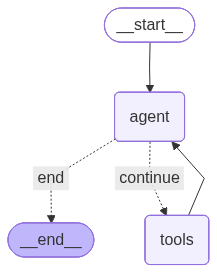

In [27]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

This visualization shows the flow: Agent → Decision → Tools → Agent → Decision → End


## Running the Complete ReAct Agent

### Final Execution


In [28]:
def print_stream(stream):
    """Helper function for formatting the stream nicely."""
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

inputs = {"messages": [HumanMessage(content="What's the weather like in Zurich, and what should I wear based on the temperature?")]}

print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

What's the weather like in Zurich, and what should I wear based on the temperature?
================================== Ai Message ==================================
Tool Calls:
  search_tool (2wt7bkehq)
 Call ID: 2wt7bkehq
  Args:
    query: current weather in Zurich
================================= Tool Message =================================
Name: search_tool

[{"title": "Z\u00fcrich April 2025 Historical Weather Data (Switzerland)", "url": "https://weatherspark.com/h/m/60160/2025/4/Historical-Weather-in-April-2025-in-Z%C3%BCrich-Switzerland", "content": "| 91%  5:40 AM | WNW | 4:36 PM | ENE | 11:18 PM | S | 249,157 mi |\n\n| 10  |\n\n| 96%  5:54 AM | W | 5:43 PM | E | 11:58 PM | S | 250,613 mi |\n\n| 11  |\n\n| 98%  6:08 AM | W | 6:49 PM | E  - |\n\n| 12  |\n\n| 99%  6:21 AM | W | 7:55 PM | ESE | 12:37 AM | S | 251,645 mi |\n\n| 13  |\n\n| 100%  6:35 AM | WSW | 9:02 PM | ESE | 1:16 AM | S | 252,262 

**What You'll See:**
1. **Initial Reasoning**: Agent analyzes the query.
2. **Tool Call 1**: Searches for Zurich weather.
3. **Tool Result Processing**: Agent examines weather data.
4. **Tool Call 2**: Gets clothing recommendations.
5. **Final Synthesis**: Agent combines all information into a helpful response.


### The Complete ReAct Cycle

The final execution demonstrates the full ReAct pattern:

1. **Reasoning**: "I need current weather data for Zurich".
2. **Acting**: Calls search_tool("Zurich weather today").
3. **Observing**: Processes search results, extracts temperature.
4. **Reasoning**: "Now I need clothing recommendations for this temperature".
5. **Acting**: Calls recommend_clothing("temperature from search").
6. **Observing**: Gets clothing suggestions.
7. **Reasoning**: "I can now provide a complete answer".
8. **Final Response**: Synthesizes weather info and clothing recommendations.


## Key Takeaways


### What Makes ReAct Powerful

1. **Transparency**: You can see the agent's reasoning process.
2. **Adaptability**: The agent can handle unexpected results and change course.
3. **Extensibility**: It's easy to add new tools and capabilities.
4. **Reliability**: The structured approach reduces hallucination and improves accuracy


### Best Practices

1. **Tool Design**: Make tools focused and reliable.
2. **Error Handling**: Plan for tool failures and unexpected results.
3. **Context Management**: Keep state manageable and relevant.
4. **User Experience**: Provide clear feedback about what the agent is doing.

The ReAct framework represents a significant step toward more capable and trustworthy AI agents that can reason through complex problems and take meaningful actions in the real world.


# Exercises

Now it's time to put your ReAct knowledge into practice! These exercises will help you build your own tools and extend the agent's capabilities.


## Exercise 1 - Build a Calculator Tool

**Objective:** Create a mathematical calculator tool that can handle complex calculations.

Your task is to create a calculator tool that can perform mathematical operations. This tool should be able to handle expressions like "2 + 3 * 4", "sqrt(16)", and "sin(π/2)".

### Instructions:
1. Create a tool called `calculator_tool` using the `@tool` decorator.
2. The tool should accept a mathematical expression as a string.
3. Use Python's `eval()` function carefully (or better yet, use the `ast` module for safety).
4. Test your tool with various mathematical expressions.
5. Add your tool to the tools list and test it with the ReAct agent.

### Starter Code:


In [49]:
import math
import ast
import operator

@tool
def calculator_tool(expression: str) -> str:
    """
    Safely evaluate mathematical expressions.
    
    :param expression: A mathematical expression as a string (e.g., "2 + 3 * 4")
    :return: The result of the calculation
    """
    # TODO: Implement safe mathematical evaluation
    # Hint: You can use ast.literal_eval for simple expressions
    # or create a safe evaluator for more complex math
    # try:
    
    # Define safe operators
    safe_operators = {
        ast.Add: operator.add,
        ast.Sub: operator.sub,
        ast.Mult: operator.mul,
        ast.Div: operator.truediv,
        ast.Pow: operator.pow,
        ast.USub: operator.neg,
        ast.UAdd: operator.pos,
    }
    
    def eval_node(node):
        """Recursively evaluate an AST node."""
        if isinstance(node, ast.Num):  # Number
            return node.n
        elif isinstance(node, ast.Constant):  # Python 3.8+
            return node.value
        elif isinstance(node, ast.BinOp):  # Binary operation
            left = eval_node(node.left)
            right = eval_node(node.right)
            op = safe_operators.get(type(node.op))
            if op is None:
                raise ValueError(f"Unsupported operation: {type(node.op).__name__}")
            return op(left, right)
        elif isinstance(node, ast.UnaryOp):  # Unary operation
            operand = eval_node(node.operand)
            op = safe_operators.get(type(node.op))
            if op is None:
                raise ValueError(f"Unsupported operation: {type(node.op).__name__}")
            return op(operand)
        else:
            raise ValueError(f"Unsupported expression type: {type(node).__name__}")
    
    try:
        # Parse the expression
        tree = ast.parse(expression, mode='eval')

        ## --Debugging prints--
        # print(tree.body.op)
        # print(tree.body.left)
        # print(tree.body.right)
        ## --------------------

        # Evaluate the expression
        result = eval_node(tree.body)
        return result
    except ZeroDivisionError:
        return "Error: Division by zero"
    except Exception as e:
        return f"Error: {str(e)}"


calculator_tool("15 * 250 +25")

# TODO: Add calculator_tool to your tools list
# TODO: Test with the agent: "What's 15% of 250 plus the square root of 144?"

/var/folders/nm/srw3ygl55jbgpddqwgysqjpm0000gn/T/ipykernel_19161/2405236223.py:70: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  calculator_tool("15 * 250 +25")


3775

In [50]:
tools=[search_tool, recommend_clothing, calculator_tool]

tools_by_name={ tool.name:tool for tool in tools}

model_react = chat_prompt | model.bind_tools(tools)

In [51]:
# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Add edges between nodes
workflow.add_edge("tools", "agent")  # After tools, always go back to agent

# Add conditional logic
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",  # If tools needed, go to tools node
        "end": END,          # If done, end the conversation
    },
)

# Set entry point
workflow.set_entry_point("agent")

# Compile the graph
graph = workflow.compile()

In [52]:
inputs = {"messages": [HumanMessage(content="What's 15% of 250 plus the square root of 144?")]}

print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

What's 15% of 250 plus the square root of 144?
================================== Ai Message ==================================
Tool Calls:
  calculator_tool (x54h9yfk4)
 Call ID: x54h9yfk4
  Args:
    expression: 15/100*250 + sqrt(144)
================================= Tool Message =================================
Name: calculator_tool

"Error: Unsupported expression type: Call"
================================== Ai Message ==================================
Tool Calls:
  calculator_tool (a39a2sf7h)
 Call ID: a39a2sf7h
  Args:
    expression: 15/100*250 + 144**(1/2)
================================= Tool Message =================================
Name: calculator_tool

49.5
================================== Ai Message ==================================

The result of 15% of 250 plus the square root of 144 is **49.5**.

Calculation breakdown:
- 15% of 250 = 0.15 × 250 = **37.5**
- √144 = **12**
- 37.5 + 

## Exercise 2 - Create a News Summary Tool

**Objective:** Build a tool that can fetch and summarize recent news articles.

Create a news summarization tool that works with the existing search functionality. This tool should take search results and create concise summaries of news articles.

### Instructions:
1. Create a `news_summarizer_tool` that takes news content and creates summaries.
2. The tool should extract key information: headline, date, main points.
3. Format the output in a readable way.
4. Test it by asking the agent to "search for recent AI news and summarize the top 3 articles".

### Starter Code:


In [54]:
search_results = [{"title": "Z\u00fcrich April 2025 Historical Weather Data (Switzerland)", "url": "https://weatherspark.com/h/m/60160/2025/4/Historical-Weather-in-April-2025-in-Z%C3%BCrich-Switzerland", "content": "| 91%  5:40 AM | WNW | 4:36 PM | ENE | 11:18 PM | S | 249,157 mi |\n\n| 10  |\n\n| 96%  5:54 AM | W | 5:43 PM | E | 11:58 PM | S | 250,613 mi |\n\n| 11  |\n\n| 98%  6:08 AM | W | 6:49 PM | E  - |\n\n| 12  |\n\n| 99%  6:21 AM | W | 7:55 PM | ESE | 12:37 AM | S | 251,645 mi |\n\n| 13  |\n\n| 100%  6:35 AM | WSW | 9:02 PM | ESE | 1:16 AM | S | 252,262 mi |\n\n| 14  |\n\n| 99%  6:52 AM | WSW | 10:10 PM | ESE | 1:57 AM | S | 252,459 mi |\n\n| 15  |\n\n| 96%  7:12 AM | WSW | 11:20 PM | SE | 2:42 AM | S | 252,209 mi | [...] Cloud Cover in April 2025 in Z\u00fcrich1815222911223344556677889910101111121213131414151516161717181819192020212122222323242425252626272728282929303012 AM12 AM3 AM3 AM6 AM6 AM9 AM9 AM12 PM12 PM3 PM3 PM6 PM6 PM9 PM9 PM12 AM12 AMMarMay\n\n0% clear 20% mostly clear 40% partly cloudy 60% mostly cloudy 80% overcast 100%\n\nno significant cloudno cloud detectedceiling and visibility ok\n\nThe hourly reported cloud coverage, categorized by the percentage of the sky covered by clouds. [...] | 16  |\n\n| 92%  7:38 AM | SW  3:29 AM | S | 251,468 mi |\n\n| 17  |\n\n| 86% | 12:27 AM | SE | 8:12 AM | SW  4:20 AM | S | 250,183 mi |\n\n| 18  |\n\n| 78% | 1:30 AM | SE | 8:57 AM | SW  5:13 AM | S | 248,313 mi |\n\n| 19  |\n\n| 69% | 2:24 AM | SE | 9:53 AM | SW  6:09 AM | S | 245,842 mi |\n\n| 20  |\n\n| 59% | 3:08 AM | SE | 11:01 AM | SW  7:04 AM | S | 242,802 mi |\n\n| 21  |\n\n| 50% | 3:42 AM | SE | 12:16 PM | SW  7:59 AM | S | 239,291 mi |\n\n| 22  |", "score": 0.82994765}, {"title": "Weather in Z\u00fcrich in October 2025 - Detailed Forecast", "url": "https://www.easeweather.com/europe/switzerland/zurich/october", "content": "| \nSunny\n16\u00b0\n | \nMist\n19\u00b0\n | \nLight rain shower\n18\u00b0\n | \nModerate or heavy rain shower\n14\u00b0\n | \nPatchy rain possible\n11\u00b0\n |\n\n| \nPatchy rain possible\n14\u00b0\n | \nSunny\n17\u00b0\n | \nPartly cloudy\n18\u00b0\n | \nPatchy rain possible\n17\u00b0\n | \nSunny\n17\u00b0\n | \nPartly cloudy\n16\u00b0\n | \nPartly cloudy\n16\u00b0\n |\n\n| \nPartly cloudy\n16\u00b0\n | \nPartly cloudy\n17\u00b0\n | \nFog\n15\u00b0\n | \nPartly cloudy\n15\u00b0\n | \nPartly cloudy\n15\u00b0\n | \nOvercast\n17\u00b0\n | \nOvercast\n17\u00b0\n | [...] | \nSunny\n17\u00b0\n | \nModerate rain at times\n15\u00b0\n | \nPatchy rain possible\n15\u00b0\n | \nSunny\n16\u00b0\n | \nPartly cloudy\n15\u00b0\n | \nPartly cloudy\n17\u00b0\n | \nPatchy rain possible\n15\u00b0\n |\n\n| \nPartly cloudy\n15\u00b0\n | \nPatchy rain possible\n17\u00b0\n | \nOvercast\n17\u00b0\n | \nModerate rain at times\n16\u00b0\n | \nPartly cloudy\n15\u00b0\n |  |  |\n\n## Temperatures trend during October in Z\u00fcrich\n\nSee the weather trend as well as the moving average line\n\n## October weather in Z\u00fcrich day by day\n\nClick on a date for more information [...] | 21 Oct. | Moderate rain at times\nModerate rain at times\n| 15\u00b0 /9\u00b0 | 4.4 mm | 4 |  |\n\n| 22 Oct. | Patchy rain possible\nPatchy rain possible\n| 15\u00b0 /7\u00b0 | 3 mm | 4 |  |\n\n| 23 Oct. | Sunny\nSunny\n| 16\u00b0 /5\u00b0 | 0.8 mm | 4 |  |\n\n| 24 Oct. | Partly cloudy\nPartly cloudy\n| 15\u00b0 /6\u00b0 | 3.4 mm | 4 |  |\n\n| 25 Oct. | Partly cloudy\nPartly cloudy\n| 17\u00b0 /6\u00b0 | 3.2 mm | 4 |  |\n\n| 26 Oct. | Patchy rain possible\nPatchy rain possible\n| 15\u00b0 /8\u00b0 | 8.7 mm | 4 |  |", "score": 0.7701369}, {"title": "Zurich weather in October 2025 - Weather25.com", "url": "https://www.weather25.com/europe/switzerland/zurich?page=month&month=October", "content": "| 26 Partly cloudy 14\u00b0 /7\u00b0 | 27 Partly cloudy 14\u00b0 /7\u00b0 | 28 Moderate rain 15\u00b0 /7\u00b0 | 29 Light rain 14\u00b0 /7\u00b0 | 30 Overcast 14\u00b0 /7\u00b0 | 31 Fog 14\u00b0 /6\u00b0 |  | [...] | Sun | Mon | Tue | Wed | Thu | Fri | Sat |\n ---  ---  --- \n|  |  |  | 1 Mist 17\u00b0 /7\u00b0 | 2 Mist 18\u00b0 /8\u00b0 | 3 Light rain shower 16\u00b0 /7\u00b0 | 4 Light rain shower 14\u00b0 /7\u00b0 |\n| 5 Light rain shower 11\u00b0 /5\u00b0 | 6 Cloudy 14\u00b0 /4\u00b0 | 7 Sunny 17\u00b0 /6\u00b0 | 8 Partly cloudy 17\u00b0 /7\u00b0 | 9 Patchy rain possible 16\u00b0 /8\u00b0 | 10 Patchy rain possible 14\u00b0 /11\u00b0 | 11 Mist 16\u00b0 /8\u00b0 | [...] The temperatures in Zurich in October are quite cold with temperatures between 5\u00b0C and 15\u00b0C, warm clothes are a must.\n\nYou can expect about 3 to 8 days of rain in Zurich during the month of October. It\u2019s a good idea to bring along your umbrella so that you don\u2019t get caught in poor weather.\n\nOur weather forecast can give you a great sense of what weather to expect in Zurich in October 2025.", "score": 0.7293082}, {"title": "Z\u00fcrich, Switzerland Weather Conditions | Weather Underground", "url": "https://www.wunderground.com/weather/ch/z%C3%BCrich", "content": "# Z\u00fcrich, Z\u00fcrich, Switzerland Weather Conditionsstar\\_ratehome\n\nicon\n\nThank you for reporting this station. We will review the data in question.\n\nYou are about to report this weather station for bad data. Please select the information that is incorrect.\n\nSee more\n\n(Reset Map)\n\nNo PWS\n\nReset Map, or Add PWS.\n\naccess\\_time 1:04 AM CEST on October 5, 2025 (GMT +2) | Updated 7 seconds ago\n\nicon\n\nCloudy\n\nGusts 10 \u00b0mph\n\nTomorrow's temperature is forecast to be MUCH COOLER than today. [...] icon\nicon\nicon\nicon\nicon\nicon\nicon\nicon\nAccess Logo\n\nWe recognize our responsibility to use data and technology for good. We may use or share your data with our data vendors. Take control of your data.\n\nThe Weather Company Logo\nThe Weather Channel Logo\nWeather Underground Logo\nStorm Radar Logo\n\n\u00a9 The Weather Company, LLC 2025", "score": 0.6836946}, {"title": "April - Zurich, Zurich, Switzerland Monthly Weather | AccuWeather", "url": "https://www.accuweather.com/en/ch/zurich/316622/april-weather/316622", "content": "Weather Forecasts\n\nThunderstorms, snow on tap this weekend as storm hits Rockies, Plains\n\n4 hours ago\n\nFeatured Stories\n\nWeather News\n\nAmerican climber Balin Miller dies aged 23 while climbing El Capitan\n\n1 day ago\n\nAstronomy\n\nDraconid meteor shower 2025: How to see October's shooting stars\n\n1 day ago\n\nWeather News\n\nConservationist Jane Goodall dies at 91\n\n2 days ago\n\nWeather News\n\nShutdown threatens to stall rural loans and flood insurance\n\n1 day ago\n\nWinter Weather [...] ### Hurricane Tracker\n\n### Severe Weather\n\n### Radar & Maps\n\n### News\n\n### Video\n\nTop Stories\n\nWinter Weather\n\nWinter forecast 2025-26: Snowy season ahead for parts of the US\n\n1 day ago\n\nHurricane\n\nWhat's next after Imelda? Two areas being monitored, including near US\n\n4 hours ago\n\nWeather Forecasts\n\nKing tides are coming to the Southeast coast: here's what to know\n\n3 hours ago\n\nWeather Forecasts\n\nTemperature swings and some much-needed rain on the way for the East\n\n7 hours ago [...] # Zurich, Zurich\n\nZurich\n\nZurich\n\n## Around the Globe\n\nAround the Globe\n\n### Hurricane Tracker\n\n### Severe Weather\n\n### Radar & Maps\n\n### News & Features\n\n### Astronomy\n\n### Business\n\n### Climate\n\n### Health\n\n### Recreation\n\n### Sports\n\n### Travel\n\n### Warnings\n\n### Data Suite\n\n### Forensics\n\n### Advertising\n\n### Superior Accuracy\u2122\n\n### Video\n\n## Monthly\n\n## April\n\n## 2025\n\n## Daily\n\n## Temperature Graph\n\n## Further Ahead\n\nFurther Ahead\n\n### July 2025\n\n## Around the Globe\n\nAround the Globe", "score": 0.5479727}]


In [ ]:
@tool
def news_summarizer_tool(news_content: str) -> str:
    """
    Summarize news articles from search results.
    
    :param news_content: Raw news content or search results
    :return: A formatted summary of the news
    """
    # TODO: Parse the news content
    # TODO: Extract key information (headlines, dates, main points)
    # TODO: Format into a readable summary
    # Hint: You might want to split by articles and process each one

    # simple way of calling the model to summarize
    summary_template = ChatPromptTemplate.from_messages([
        (
            "system", 
            """You are a news summarization assistant. Summarize the key points from the provided articles.
            Keep the summary concise and informative. Return the summary in a single paragraph."""
        ),
        (
            "human", 
            "Summarize the following news articles:\n{articles}"
        ),
    ])
    summary_chain = summary_template | model
    response = summary_chain.invoke({"articles": news_content})
    final_summary = response.content

    return final_summary

In [83]:
news_content = """
### 2025 AI Index Report Highlights Global AI Growth

In 2024, global AI regulations more than doubled compared to 2023, reaching 59 regulations from U.S. federal agencies alone. Legislative mentions of AI rose 21.3% across 75 countries. Major national investments include Canada ($2.4B), China ($47.5B semiconductor fund), France (€109B), India ($1.25B), and Saudi Arabia. AI adoption is accelerating in healthcare (FDA approved 223 AI medical devices in 2023) and transportation (Waymo provides 150k+ autonomous rides weekly). Private AI investment hit $109.1B in the U.S. in 2024, 12x China's investment, with $33.9B in generative AI investments globally. 78% of organizations reported AI usage in 2024, up from 55% in 2023.
"""

summary = news_summarizer_tool(news_content)
summary

"<think>\nOkay, I need to summarize the key points from this news article. Let me read through it again.\n\nSo, the main topic is the 2025 AI Index Report that highlights global AI growth. First, there's a mention of regulations: in 2024, global AI regulations doubled from 2023 to 59 from U.S. agencies alone. Then, legislative mentions increased by 21.3% across 75 countries. \n\nNext, major investments from different countries: Canada $2.4B, China $47.5B in semiconductors, France €109B, India $1.25B, and Saudi Arabia. The report also talks about AI adoption in healthcare with FDA approving 223 devices in 2023 and transportation with Waymo's 150k autonomous rides weekly. \n\nPrivate investment in the U.S. is $109.1B, which is 12 times China's investment. Global generative AI investment is $33.9B. Lastly, 78% of organizations use AI, up from 55% in 2023.\n\nI need to condense these points into a concise paragraph. Start with the regulations doubling in 2024, mention the legislative menti

In [84]:
summary.split("</think>")[-1].strip()

'The 2025 AI Index Report indicates rapid global AI expansion, with U.S. federal AI regulations doubling to 59 in 2024 and legislative references rising 21.3% across 75 countries. Major investments include Canada ($2.4B), China’s $47.5B semiconductor fund, France’s €109B, India ($1.25B), and Saudi Arabia. AI adoption soared in healthcare (223 FDA-approved AI medical devices in 2023) and transportation (Waymo’s 150,000+ weekly autonomous rides). U.S. private AI investment reached $109.1B in 2024—12 times China’s level—and global generative AI funding hit $33.9B. Meanwhile, 78% of organizations reported AI usage in 2024, up from 55% in 2023.'

In [85]:
# TODO: Add to tools list and test with:
tools=[search_tool, recommend_clothing, calculator_tool, news_summarizer_tool]
tools_by_name={ tool.name:tool for tool in tools}

In [86]:
tools

[StructuredTool(name='search_tool', description='Search the web for information using Tavily API.\n\n:param query: The search query string\n:return: Search results related to the query', args_schema=<class 'langchain_core.utils.pydantic.search_tool'>, func=<function search_tool at 0x106f91bc0>),
 StructuredTool(name='recommend_clothing', description='Returns a clothing recommendation based on the provided weather description.\n\nThis function examines the input string for specific keywords or temperature indicators \n(e.g., "snow", "freezing", "rain", "85°F") to suggest appropriate attire. It handles \ncommon weather conditions like snow, rain, heat, and cold by providing simple and practical \nclothing advice.\n\n:param weather: A brief description of the weather (e.g., "Overcast, 64.9°F")\n:return: A string with clothing recommendations suitable for the weather', args_schema=<class 'langchain_core.utils.pydantic.recommend_clothing'>, func=<function recommend_clothing at 0x11a8a58a0>)

In [87]:
model_react = chat_prompt | model.bind_tools(tools)

In [88]:
# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Add edges between nodes
workflow.add_edge("tools", "agent")  # After tools, always go back to agent

# Add conditional logic
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",  # If tools needed, go to tools node
        "end": END,          # If done, end the conversation
    },
)

# Set entry point
workflow.set_entry_point("agent")

# Compile the graph
graph = workflow.compile()

## Testing Your Solutions

For each exercise, test your implementation with these commands:


In [75]:
# Exercise 1 Test
inputs = {"messages": [HumanMessage(content="Calculate 15% of 250 plus the square root of 144")]}
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Calculate 15% of 250 plus the square root of 144
================================== Ai Message ==================================
Tool Calls:
  calculator_tool (08p1689ea)
 Call ID: 08p1689ea
  Args:
    expression: 0.15 * 250 + 144 ** 0.5
================================= Tool Message =================================
Name: calculator_tool

49.5
================================== Ai Message ==================================

The calculation of 15% of 250 plus the square root of 144 is **49.5**.  

### Breakdown:
1. **15% of 250** = $ 0.15 \times 250 = 37.5 $  
2. **Square root of 144** = $ \sqrt{144} = 12 $  
3. **Total** = $ 37.5 + 12 = 49.5 $


In [89]:
# Exercise 2 Test  
inputs = {"messages": [HumanMessage(content="Find recent AI news and summarize the top 3 articles")]}
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Find recent AI news and summarize the top 3 articles
================================== Ai Message ==================================
Tool Calls:
  search_tool (mxk5j2eb5)
 Call ID: mxk5j2eb5
  Args:
    query: top 3 recent AI news articles 2023
================================= Tool Message =================================
Name: search_tool

[{"title": "China is starting to talk about AI superintelligence, and some in the ...", "url": "https://www.nbcnews.com/tech/tech-news/china-starting-talk-ai-superintelligence-us-are-taking-notice-rcna234675", "content": "The concept of superintelligence has long been on the minds of \u2014 if not explicitly guiding \u2014 prominent American AI companies. For example, OpenAI released an article focused on the safe development of superintelligent AI models in May 2023. \u201cNow is a good time to start thinking about the governance of superintelligence \u2014 future 

In [90]:
# check news summarizer output

summary_output = """
"<think>\nOkay, let's start by looking at the three articles provided. \n\nThe first article is about China focusing on AI superintelligence (ASI) and its potential to revolutionize technology, specifically mentioning curing diseases and interstellar travel. The U.S. is responding with safety protocols and there's a perceived race between the two countries. I need to make sure to capture both China's initiative and the U.S. reaction here.\n\nThe second article mentions Malaysia launching Ryt Bank as its first AI-powered bank. Also, the U.S. and Japan are collaborating on a broad tech partnership. These are two separate points about AI in banking and international tech collaboration. I should note both of these developments.\n\nThe third article from AI Magazine talks about innovations like Microsoft's AI Data Centre, AI actors in films, and digital transformation in insurance. These are examples of AI applications across different sectors. I need to summarize these innovations concisely.\n\nNow, I need to combine all these points into a single paragraph without being too verbose. Start with China's focus on ASI and the U.S. response. Then mention Malaysia's Ryt Bank and the U.S.-Japan tech collaboration. Finally, list the AI innovations from the third article. Make sure each key point is included but the summary remains concise. Avoid using technical jargon and keep the language clear and informative. Also, check that the summary is in a single paragraph as requested.\n</think>\n\nChina is focusing on developing artificial superintelligence (ASI) with goals like disease cures and interstellar travel, prompting U.S. AI firms and policymakers to accelerate safety measures and fueling a \"race\" for global AI leadership. Meanwhile, Malaysia inaugurated Ryt Bank, Asia's first AI-powered bank, and the U.S. and Japan announced a joint technology partnership. Innovations highlighted in AI Magazine include Microsoft\u2019s AI Data Centre, AI-driven film roles (like \"AI actors\"), and digital transformation in the insurance industry, underscoring AI\u2019s expanding impact across sectors.
"""

# summary_output.split("</think>")[-1].strip()
pprint(summary_output.split("</think>")[-1].strip())

('China is focusing on developing artificial superintelligence (ASI) with '
 'goals like disease cures and interstellar travel, prompting U.S. AI firms '
 'and policymakers to accelerate safety measures and fueling a "race" for '
 "global AI leadership. Meanwhile, Malaysia inaugurated Ryt Bank, Asia's first "
 'AI-powered bank, and the U.S. and Japan announced a joint technology '
 'partnership. Innovations highlighted in AI Magazine include Microsoft’s AI '
 'Data Centre, AI-driven film roles (like "AI actors"), and digital '
 'transformation in the insurance industry, underscoring AI’s expanding impact '
 'across sectors.')
